In [47]:
"""
Description : 
Jono is a Data Science who works in a company selling Honey online, called Madugital. The CRM Madugital manager, Joni, is wondering which Customer has big potensial to buy their product based on their website activity, thus Magudital can contact the customer faster with proper treatment.
Madugital has leads collection consist of data from  their customers when accessing the website through several marketing channel. some bought the products and some did not buy, which recorded in 'converted' column. CRM team provided an excel table for the data point as Jono requested. 
Goal : 
Please help Jono with a model to fulfill the business team request
"""
import pandas as pd
import os 
import sys

if os.path.isfile("lead_scoring.csv"):
    print("File Ada")
else:
    print("File tidak ada")
    sys.exit() #stop the process

data_path = os.path.join("","lead_scoring.csv")

data = pd.read_csv(data_path)
#dataoriginal = data
print('Data Original')
total_data = data.info()
print(total_data)

#checking nill and NaN
null_data = data.isnull().sum()
#print(null_data)

#manipulating data by completing the uncompleted data
#step #1 - using existing data (original data)
#replace the NaN data or fill Null data with reasonable value
data['How did you hear about Madugital'].fillna('Undescribed',inplace=True)
data['What is your current occupation'].fillna('Unlisted',inplace=True)
data['What matters most to you in choosing a product'].fillna('Others',inplace=True)
data['Country'].fillna('Others',inplace=True)
data['Specialization'].fillna('General',inplace=True)
data['Lead Source'].fillna('Unknown',inplace=True) 
data['TotalVisits'].fillna(1.5,inplace=True)
data['Page Views Per Visit'].fillna(1.75,inplace=True)
data['Last Activity'].fillna('Undefined',inplace=True)
data['Tags'].fillna('Will be followed up',inplace=True)
data['Lead Quality'].fillna('Unknown',inplace=True)
data['Lead Profile'].fillna('Will be Selected',inplace=True)
data['City'].fillna('Cities in Indonesia',inplace=True)
"""
01.High
02.Medium
03.Low
04.Lowest
"""
data['Asymmetrique Activity Index'].fillna('04.Lowest',inplace=True)
data['Asymmetrique Profile Index'].fillna('04.Lowest',inplace=True)
"""
lowest score 7.0 highest 18.0 for Activity
lowest score 10.0 highest 20.0 for Profile
"""
data['Asymmetrique Activity Score'].fillna(5.0,inplace=True)
data['Asymmetrique Profile Score'].fillna(5.0,inplace=True)

#Checking after replace
print('Data Original after modified')
data.info()
null_data = data.isnull().sum()
print(null_data)

#saving results to csv
print('saving modified data')
data.to_csv('lead_scoring_clean.csv',index=False)


#step #2 - removing unclean record from 2 field to get focus data
#removing the uncompleted record
dataoriginal = pd.read_csv(data_path)
#dataoriginal.info()
print('Data Original')
null_data = dataoriginal.isnull().sum()
print(null_data)

#removing the information in field 'How did you hear about Madugital' and 'What matters most to you in choosing a product' to get a focus data to be followed up
#removing the 'How did you hear about Madugital'+'What matters most to you in choosing a product', remaining data 6531 of 9240
dataoriginal = dataoriginal.dropna(subset=['How did you hear about Madugital','What matters most to you in choosing a product'],axis=0)

#replace the NaN data or fill Null data with reasonable value
dataoriginal['Lead Source'].fillna('Unknown',inplace=True) 
dataoriginal['TotalVisits'].fillna(1.5,inplace=True)
dataoriginal['Page Views Per Visit'].fillna(1.75,inplace=True)
dataoriginal['Last Activity'].fillna('Undefined',inplace=True)
dataoriginal['Country'].fillna('Others',inplace=True)
dataoriginal['Tags'].fillna('Will be followed up',inplace=True)
dataoriginal['Lead Quality'].fillna('Unknown',inplace=True)
"""
Value for Asymmetrique Index:
01.High
02.Medium
03.Low
04.Lowest
"""
dataoriginal['Asymmetrique Activity Index'].fillna('04.Lowest',inplace=True)
dataoriginal['Asymmetrique Profile Index'].fillna('04.Lowest',inplace=True)
"""
Value for Asymmetrique Score:
lowest score 7.0 highest 18.0 for Activity
lowest score 10.0 highest 20.0 for Profile
"""
dataoriginal['Asymmetrique Activity Score'].fillna(5.0,inplace=True)
dataoriginal['Asymmetrique Profile Score'].fillna(5.0,inplace=True)

#Checking after replace
print('Data Original after removed and modified')
dataoriginal.info()
null_data = dataoriginal.isnull().sum()
print(null_data)

#saving results to csv
print('Data modified saved')
dataoriginal.to_csv('lead_scoring_focus.csv',index=False)


File Ada
Data Original
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Prospect ID                                     9240 non-null   object 
 1   Lead Number                                     9240 non-null   int64  
 2   Lead Origin                                     9240 non-null   object 
 3   Lead Source                                     9204 non-null   object 
 4   Do Not Email                                    9240 non-null   object 
 5   Do Not Call                                     9240 non-null   object 
 6   Converted                                       9240 non-null   int64  
 7   TotalVisits                                     9103 non-null   float64
 8   Total Time Spent on Website                     9240 non-null   int64  
 9   Page Views Per Vis

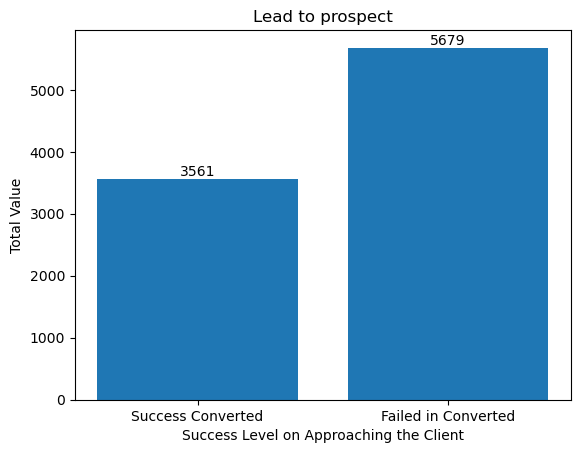

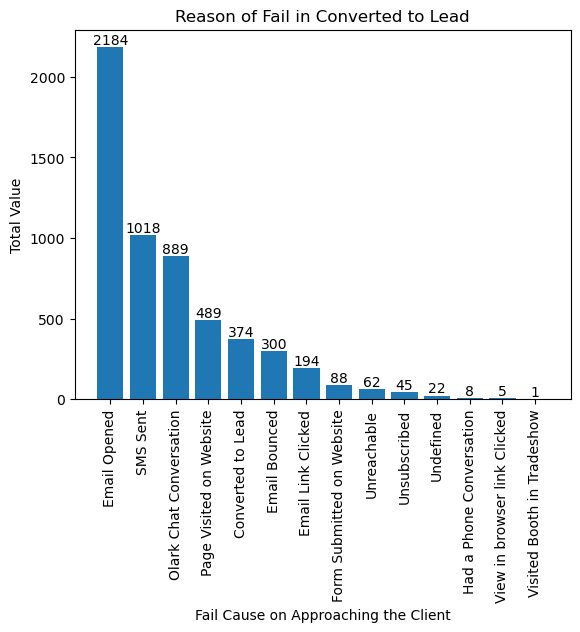

In [49]:
#Manipulating data using the clean data
#import the units
import pandas as pd
import os 
import sys
import matplotlib.pyplot as plt

#Loading data
data_path=os.path.join('','lead_scoring_clean.csv')
data = pd.read_csv(data_path)
#data.info() #9240
#null_data = data.isnull().sum()
#print(null_data)

#add field to accommodate converted information
#add 'Success' where 'Converted' == 1
#Converted consists only 1 dan 0, 1 for sukses, 0 for gagal
#put additional variable to provide the lable
data['Success'] = data['Converted'].apply(lambda x: 1 if x == 1 else 0)
data['NotSuccess'] = data['Converted'].apply(lambda x: 1 if x == 0 else 0)
data['Hasil'] = data['Converted'].apply(lambda x:'Sukses' if x==1 else 'Gagal')

Sukses = data['Success'].sum()
Gagal = data['NotSuccess'].sum()
#print(Sukses,' ',Gagal)

#prepare the bar chart
plt.bar(['Success Converted','Failed in Converted'], [Sukses, Gagal])
plt.xlabel('Success Level on Approaching the Client')
plt.ylabel('Total Value')
plt.text(0, Sukses+0.1, str(Sukses), ha='center', va='bottom')
plt.text(1, Gagal+0.1, str(Gagal), ha='center', va='bottom')
plt.title('Lead to prospect')
plt.show()

#Checking on why failed
#Check on the Last Activity

alasan=data.query('Hasil=="Gagal"')['Last Activity'].value_counts()
#print(alasan)
plt.bar(alasan.index,alasan.values)
plt.xlabel('Fail Cause on Approaching the Client')
plt.ylabel('Total Value')
plt.title('Reason of Fail in Converted to Lead')
plt.xticks(rotation=90)
for i, v in enumerate(alasan.values):
    plt.text(i, v+0.1, str(v), ha='center', va='bottom')
plt.show()




In [14]:
data['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'Undefined', 'Approached upfront', 'SMS Sent',
       'Visited Booth in Tradeshow', 'Resubscribed to emails',
       'Email Received', 'Email Marked Spam'], dtype=object)

In [87]:
dataoriginal = pd.read_csv(data_path)
#dataoriginal.info()
#null_data = dataoriginal.isnull().sum()
#print(null_data)

#data['How did you hear about Madugital'].unique
#data['What matters most to you in choosing a product'].unique
#Tags consists of how the client will be followed up or have followed up
#Lead Quality - some definition of how the client can/cant be followed up

#removing the information in field 'How did you hear about Madugital' and 'What matters most to you in choosing a product' to get a focus data to be followed up
dataoriginal = dataoriginal.dropna(subset=['How did you hear about Madugital','What matters most to you in choosing a product'],axis=0)
#removing How did you hear about Madugital+What matters most to you in choosing a product, remaining data 6531 dari 9240
null_data = dataoriginal.isnull().sum()
print(null_data)
dataoriginal.info()


Prospect ID                                          0
Lead Number                                          0
Lead Origin                                          0
Lead Source                                         36
Do Not Email                                         0
Do Not Call                                          0
Converted                                            0
TotalVisits                                        130
Total Time Spent on Website                          0
Page Views Per Visit                               130
Last Activity                                      103
Country                                           1605
Specialization                                       0
How did you hear about Madugital                     0
What is your current occupation                      0
What matters most to you in choosing a product       0
Search                                               0
Magazine                                             0
Newspaper 

In [56]:
data['Asymmetrique Activity Score'].unique
data[data['Asymmetrique Activity Score'] == 19.0].shape[0]
#01.High 821
#02.Medium 3839
#03.Low 362, All = 5022
#null_data = data.isnull().sum()
#print(null_data)


0